# Exploratory Data Analysis (EDA) On Movies Dataset

Exploratory Data Analysis (EDA) on the movies dataset.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('movies.csv')
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,30-03-2022,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,24-03-2022,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger
2,335787,Uncharted,Action-Adventure,en,A young street-smart Nathan Drake and his wise...,3581.549,Columbia Pictures-Atlas Entertainment-PlayStat...,10-02-2022,120000000,395124202,116.0,Released,Fortune favors the bold.,7.2,1981,Tom Holland-Mark Wahlberg-Sophia Ali-Tati Gabr...,treasure-treasure hunt-based on video game
3,639933,The Northman,Action-Adventure-Drama-Fantasy-Thriller,en,Prince Amleth is on the verge of becoming a ma...,3451.658,New Regency Pictures-Focus Features-Perfect Wo...,07-04-2022,70000000,58120000,137.0,Released,Conquer your fate.,7.6,926,Alexander Skarsgård-Nicole Kidman-Claes Bang-E...,sword-father murder-prince-iceland-viking-nort...
4,414906,The Batman,Crime-Mystery-Thriller,en,In his second year of fighting crime Batman un...,3419.546,6th & Idaho-Dylan Clark Productions-DC Films-W...,01-03-2022,185000000,768442517,176.0,Released,Unmask the truth.,7.8,4637,Robert Pattinson-Zoë Kravitz-Paul Dano-Jeffrey...,crime fighter-secret identity-nightclub-politi...


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df.shape

(780113, 17)

In [5]:
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'keywords'],
      dtype='object')

In [6]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780113 entries, 0 to 780112
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    780113 non-null  int64  
 1   title                 780107 non-null  object 
 2   genres                549671 non-null  object 
 3   original_language     780113 non-null  object 
 4   overview              653411 non-null  object 
 5   popularity            780113 non-null  float64
 6   production_companies  364964 non-null  object 
 7   release_date          717304 non-null  object 
 8   budget                780113 non-null  int64  
 9   revenue               780113 non-null  int64  
 10  runtime               738484 non-null  float64
 11  status                780113 non-null  object 
 12  tagline               116967 non-null  object 
 13  vote_average          780113 non-null  float64
 14  vote_count            780113 non-null  int64  
 15  

In [7]:
# Display summary statistics for numerical columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,vote_count
count,780113.000000,780113.000000,7.801130e+05,7.801130e+05,7.384840e+05,780113.000000,780113.000000
mean,526307.431716,1.919162,3.901217e+05,9.673702e+05,1.905858e+02,2.547586,27.111506
std,249784.101051,18.615032,7.869790e+06,1.974239e+07,8.285542e+04,3.194000,355.028453
min,2.000000,0.600000,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,331905.000000,0.600000,0.000000e+00,0.000000e+00,6.000000e+00,0.000000,0.000000
50%,533865.000000,0.600000,0.000000e+00,0.000000e+00,5.400000e+01,0.000000,0.000000
75%,732343.000000,1.341000,0.000000e+00,0.000000e+00,9.000000e+01,5.700000,2.000000
max,968161.000000,6852.303000,5.000000e+09,2.847246e+09,5.050505e+07,10.000000,31506.000000


## Handling Missing Values

In [8]:
df.isna().sum()

id                           0
title                        6
genres                  230442
original_language            0
overview                126702
popularity                   0
production_companies    415149
release_date             62809
budget                       0
revenue                      0
runtime                  41629
status                       0
tagline                 663146
vote_average                 0
vote_count                   0
credits                 237899
keywords                552009
dtype: int64

In [9]:
# Display the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.sort_values(ascending=False)

tagline                 85.006403
keywords                70.760133
production_companies    53.216521
credits                 30.495454
genres                  29.539567
overview                16.241493
release_date             8.051269
runtime                  5.336278
title                    0.000769
vote_count               0.000000
vote_average             0.000000
id                       0.000000
status                   0.000000
revenue                  0.000000
popularity               0.000000
original_language        0.000000
budget                   0.000000
dtype: float64

- The columns with a high percentage of missing values (e.g., 'tagline', 'keywords').
- we can consider imputing or dropping rows for columns like 'genres', 'overview', and 'production_companies' based on the specific analysis or modeling needs.

### Drop Duplicate Rows

In [10]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
# Fill missing values in object columns with "Not Available"
object_columns = df.select_dtypes(include='object').columns
df[object_columns] = df[object_columns].fillna('Not Available')


In [12]:
# Calculate the mean of the 'runtime' column
mean_runtime = df['runtime'].mean()

# Replace missing values in 'runtime' with the mean
df['runtime'].fillna(mean_runtime, inplace=True)


## Correlation Analysis

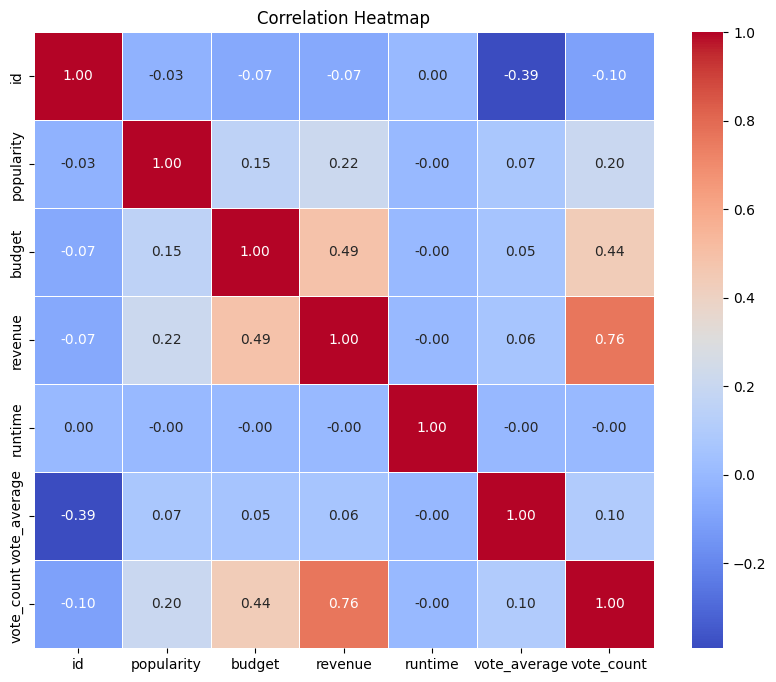

In [13]:
# Selecting only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


- Popularity has a positive correlation with both budget and revenue, which means that more popular movies tend to have higher budgets and make more money.
- popularity is a more important factor in determining a movie's financial success.

- Budget also has a positive correlation with revenue

- Runtime has a negative correlation with both popularity and revenue. This means that longer movies tend to be less popular and make less money than shorter movies.

- Vote_average has a positive correlation with both popularity and revenue. This suggests that movies with higher average ratings from viewers tend to be more popular

- There is a strong positive correlation (0.76) between 'vote_count' and 'budget, revenue, profit'. Movies with higher revenues, budget, and profit tend to attract more votes, suggesting that financial success may be associated with increased viewer engagement.



## Checking Outliers

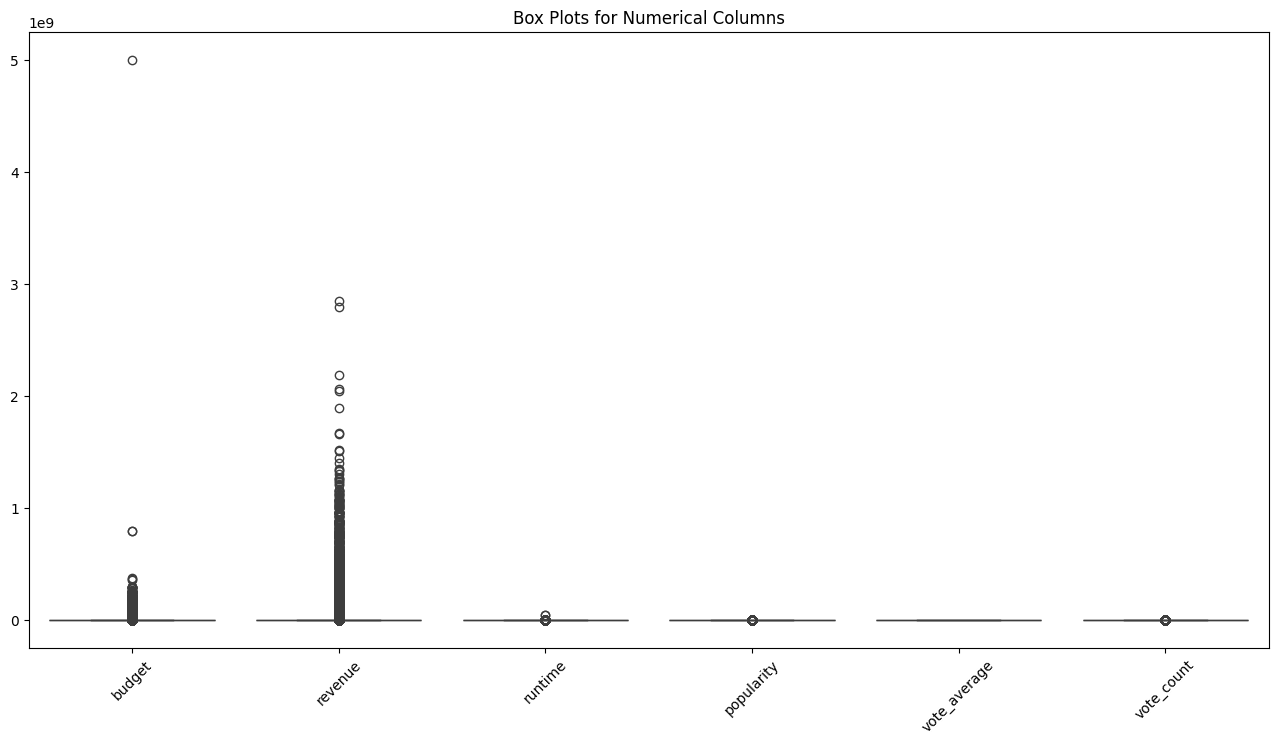

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for box plot
numerical_columns = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']

# Create box plots for numerical columns
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plots for Numerical Columns')
plt.xticks(rotation=45)
plt.show()


The box plots suggest that there is a lot of variability in the values of the six numerical columns in the dataset. There are a few outliers in the budget, revenue, runtime, and popularity columns, but the vote average and vote count columns are more consistent.

In [15]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = zscore(df[numerical_columns])

# Identify outliers based on a threshold (e.g., Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Display the count of outliers for each numerical column
print("Count of Outliers for Each Numerical Column:")
print(pd.DataFrame(outliers, columns=numerical_columns).sum())


Count of Outliers for Each Numerical Column:
budget          3471
revenue         2768
runtime            2
popularity      1726
vote_average       0
vote_count      3606
dtype: int64


Checking outliers for runtime column

In [16]:
longest_runtime = df['runtime']
longest_runtime = longest_runtime.nlargest(3)
longest_runtime

695505    50505050.0
694365    50189181.0
47404        51420.0
Name: runtime, dtype: float64

In [17]:
# Filter the DataFrame for specific runtime values
df[(df['runtime'] == 50505050.0) | (df['runtime'] == 50189181.0) | (df['runtime'] == 51420.0)]


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords
47404,421017,Logistics,Documentary,en,Logistics or Logistics Art Project is a 2012 e...,4.422,Not Available,01-12-2012,0,0,51420.0,Released,Not Available,10.0,2,Not Available,Not Available
67477,421017,Logistics,Documentary,en,Logistics or Logistics Art Project is a 2012 e...,3.277,Not Available,01-12-2012,0,0,51420.0,Released,Not Available,10.0,2,Not Available,Not Available
694365,660969,Mr Marcus FriendBoop Facebook Adventures,Not Available,en,Part 2 of 3,0.600,Not Available,Not Available,0,0,50189181.0,Released,Funny Mark Boy Zuckerberg Forcefield Guy Funny...,0.0,0,Not Available,Not Available
695505,660968,Mr Marcus FriendPop Facebook Adventures,Not Available,en,Part 1 of 3,0.600,Not Available,Not Available,0,0,50505050.0,Released,Funny Mark Boy Zuckerberg Forcefield Guy Funny...,0.0,0,Not Available,Not Available


All these runtime data are meaningful, these are documentary films and it has a long watch time. hence removing it may result in a loss of important information.

In [18]:
outliers_df = df[outliers]
print("DataFrame with Outliers:")
outliers_df

DataFrame with Outliers:


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords
0,NaN,NaN,NaN,NaN,NaN,6852.303,NaN,NaN,110000000.0,355200000.0,NaN,NaN,NaN,NaN,1465.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,5805.799,NaN,NaN,74000000.0,164289828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,3581.549,NaN,NaN,120000000.0,395124202.0,NaN,NaN,NaN,NaN,1981.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,3451.658,NaN,NaN,70000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3419.546,NaN,NaN,185000000.0,768442517.0,NaN,NaN,NaN,NaN,4637.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These outliers represent valid and meaningful data points, removing them may result in a loss of important information.

In [19]:
df.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,30-03-2022,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,24-03-2022,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger


## Converting release date to Datetime Object

In [20]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

## Top 10 Movie Titles by Popularity:

In [21]:
# Display top 10 movie titles by popularity
top_titles = df.nlargest(10, 'popularity')[['title', 'popularity','original_language']]
print(top_titles)


                                         title  popularity original_language
0                         Sonic the Hedgehog 2    6852.303                en
1                                The Lost City    5805.799                en
2                                    Uncharted    3581.549                en
3                                 The Northman    3451.658                en
4                                   The Batman    3419.546                en
5                          The Exorcism of God    3409.916                en
6                                      Morbius    3226.513                en
7                      Spider-Man: No Way Home    3000.059                en
8  Doctor Strange in the Multiverse of Madness    2910.581                en
9                                 The Bad Guys    2784.167                en


In [22]:
df.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,2022-03-30,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,2022-03-24,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger


## Count of Movies for Each Language:

### checking the unique languages

In [23]:
print('Total unique languages: ',df['original_language'].nunique())

Total unique languages:  165


In [24]:
print('All unique languages: \n',df['original_language'].unique())

All unique languages: 
 ['en' 'fr' 'la' 'es' 'ko' 'ja' 'sv' 'ru' 'hi' 'it' 'no' 'th' 'de' 'cn'
 'zh' 'pl' 'pt' 'te' 'id' 'tr' 'tl' 'ml' 'fi' 'da' 'nl' 'kn' 'xx' 'el'
 'sr' 'ro' 'lv' 'fa' 'is' 'bn' 'ms' 'sk' 'ar' 'ca' 'uk' 'he' 'eu' 'cs'
 'nb' 'ka' 'hu' 'mk' 'ta' 'ga' 'ur' 'pa' 'vi' 'ne' 'lt' 'bs' 'sh' 'dz'
 'bg' 'hy' 'kk' 'et' 'gl' 'af' 'eo' 'sw' 'bo' 'mr' 'mi' 'hr' 'wo' 'lo'
 'mn' 'as' 'km' 'mt' 'ku' 'ps' 'yi' 'st' 'uz' 'sl' 'iu' 'rw' 'bm' 'si'
 'se' 'os' 'zu' 'ak' 'am' 'cy' 'qu' 'sq' 'my' 'xh' 'yo' 'ff' 'gu' 'ay'
 'az' 'gd' 'lb' 'jv' 'tw' 'ky' 'or' 'ln' 'tg' 'be' 'ig' 'rm' 'ie' 'sm'
 'lg' 'sa' 'fy' 'sn' 'ti' 'so' 'ht' 'kl' 'ba' 'mg' 'ha' 'ss' 'dv' 'tt'
 'cr' 'tk' 'mo' 'ny' 'mh' 'ce' 'ab' 'bi' 'gn' 'fo' 'nn' 'ii' 'co' 'ks'
 'oj' 'ug' 'su' 'fj' 'tn' 'to' 'oc' 'sg' 'nv' 'ch' 'sd' 'sc' 'li' 'av'
 'ty' 'za' 'kw' 'ts' 'gv' 'pi' 'kg' 'om' 'ki' 'rn' 'an']


In [25]:
# Count of movies for each language
language_counts = df['original_language'].value_counts()
language_counts


original_language
en    414295
fr     47750
es     44769
de     38629
ja     30797
       ...  
ty         1
ch         1
tn         1
fj         1
an         1
Name: count, Length: 165, dtype: int64

### Dominant Language:

English (en) is the dominant language in the dataset, with a significantly higher count than other languages. This is common in many global datasets, as English is widely used in the international film industry.
### Top Non-English Languages:

After English, the top non-English languages include French (fr), Spanish (es), German (de), and Japanese (ja). These languages have a substantial number of movies represented in the dataset.

 ## Genre Distribution

Count of movies for each genre: 
 genres
Not Available      230408
Drama              190626
Documentary        121518
Comedy             119997
Romance             46489
Animation           44005
Thriller            41949
Action              40678
Horror              39904
Music               37353
Crime               29534
Family              25222
Adventure           21807
TV Movie            21466
Science Fiction     18665
Fantasy             18496
Mystery             16738
History             14378
War                  9668
Western              8541
Name: count, dtype: int64


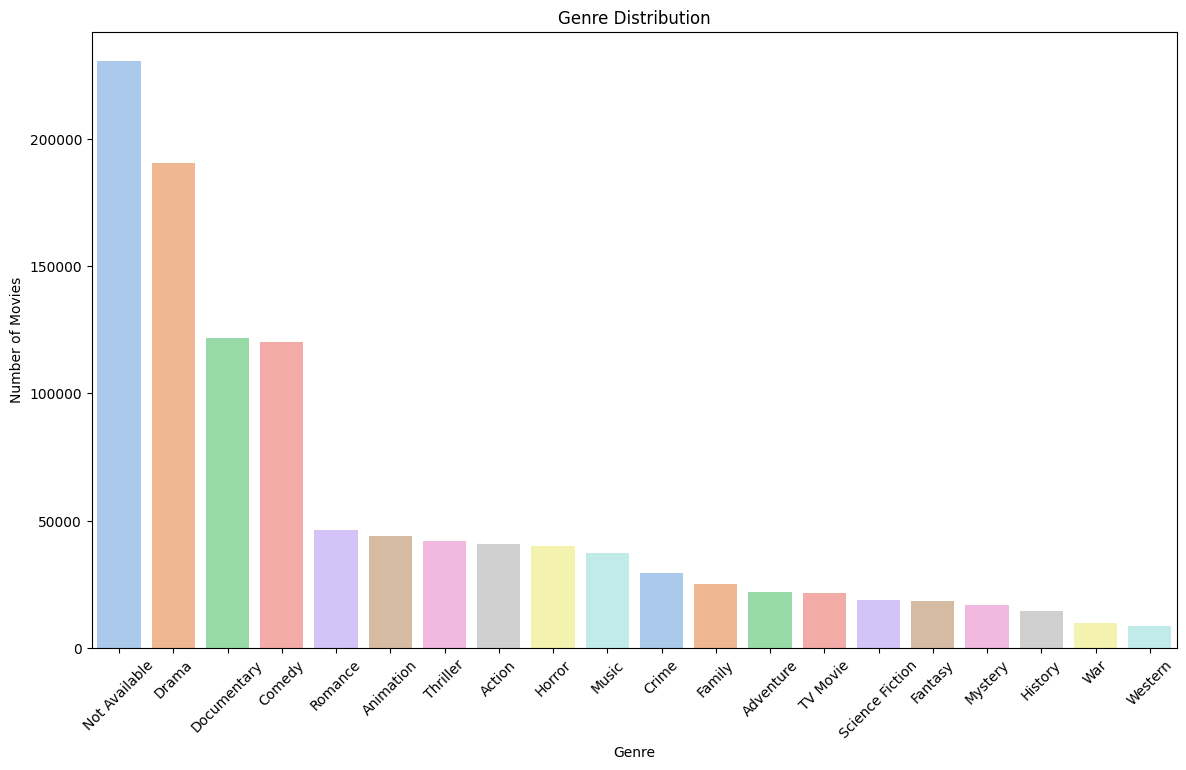

In [26]:
# Count of movies for each genre
genres_counts = df['genres'].str.split('-').explode().value_counts()
print('Count of movies for each genre: \n',genres_counts)

# Plotting count of movies for each genre
plt.figure(figsize=(14, 8))
sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='pastel')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

### Not Available Genres:

A significant number of movies (230,408) have an undefined or missing genre.
### Top Genres:

The most common genres include Drama (190,626), Documentary (121,518), and Comedy (119,997). These genres are often popular and cover a broad range of themes.
### Specialized Genres:

Genres like Animation (44,005), Science Fiction (18,665), Fantasy (18,496), and Mystery (16,738) indicate the presence of movies with specific themes, appealing to audiences interested in those genres.
### Mainstream Genres:

Genres like Action (40,678), Thriller (41,949), Romance (46,489), and Horror (39,904) are popular mainstream genres, suggesting a broad audience interest in these categories.
### Niche Genres:

Genres with lower counts, such as War (9,668), Western (8,541), and History (14,378), represent more niche categories with a potentially more focused audience.
### TV Movies:

The count of movies labeled as "TV Movie" (21,466) suggests the presence of content specifically produced for television.

**These are some valuable insights from the genres.**

In [27]:
# Average popularity for each genre
avg_popularity_by_genre = df.groupby('genres')['popularity'].mean().sort_values(ascending=False)
print('Average popularity for each genre: \n',avg_popularity_by_genre)


Average popularity for each genre: 
 genres
Action-Science Fiction-Comedy-Family-Adventure    6852.303000
Animation-Comedy-Action-Family-Crime              2784.167000
Action-Adventure-Drama-Fantasy-Thriller           1726.129000
Animation-Family-Fantasy-Comedy-Adventure          965.425000
Action-Adventure-Comedy-Romance                    649.949333
                                                     ...     
Fantasy-Music-Horror-Comedy                          0.600000
Science Fiction-Drama-Mystery-Fantasy                0.600000
Fantasy-Music-Mystery                                0.600000
Adventure-Crime-Drama-Western                        0.600000
Music-Animation-Drama-Romance-Mystery                0.600000
Name: popularity, Length: 10620, dtype: float64


### Action-Science Fiction-Comedy-Family-Adventure are the most popular ones

## Word Cloud for Movie Overviews:

In [28]:
# from wordcloud import WordCloud
# # Generate word cloud for movie overviews
# wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['overview'].dropna()))

# # Display the word cloud
# plt.figure(figsize=(12, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Movie Overviews')
# plt.show()

## Adding a profit column

In [29]:
# Create a new column 'profit' by subtracting 'budget' from 'revenue'
df['profit'] = df['revenue'] - df['budget']

In [30]:
df.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,profit
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,2022-03-30,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...,245200000
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,2022-03-24,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger,90289828


 ### Relationship between Budget and Revenue

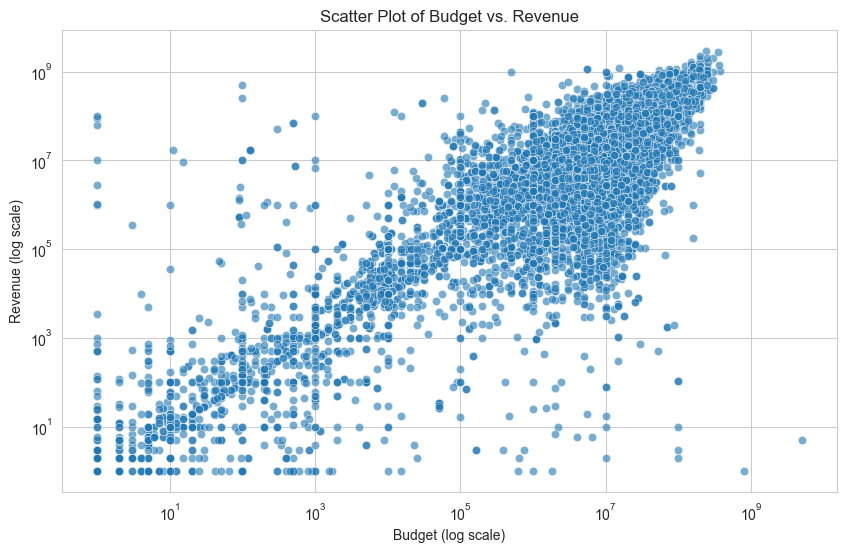

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.6)
plt.xscale('log')
plt.yscale('log')

# Add labels and a title
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')
plt.show()


**Positive Correlation:** There's a clear positive correlation between budget and revenue. This means that as the budget increases, the revenue tends to increase as well.

**Not Perfectly Linear:** The relationship isn't perfectly linear, as there's some scatter in the data points. This suggests that other factors beyond budget also influence revenue.

## Distribution, trends, and factors influencing movie profits

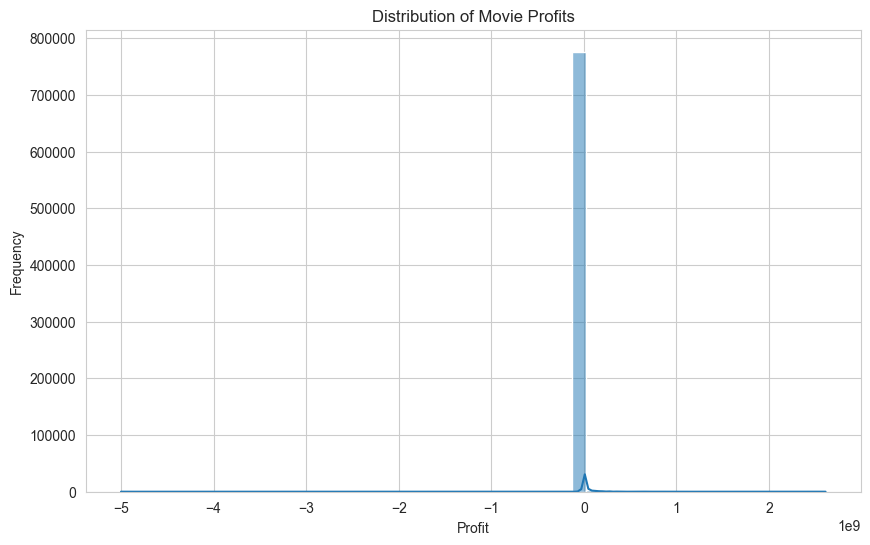

count    7.797270e+05
mean     5.764003e+05
std      1.733860e+07
min     -5.000000e+09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.610246e+09
Name: profit, dtype: float64


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
profit_stats = df['profit'].describe()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['profit'], bins=50, kde=True)
plt.title('Distribution of Movie Profits')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

print(profit_stats)


**Skewed:** The distribution is skewed to the left, indicating that most movies have lower profits, with fewer movies achieving exceptionally high profits.

**Concentration:** The peak of the distribution is around -2 on the profit axis, suggesting that the most common profit range is slightly negative.

**Tail:** The elongated tail to the right implies the presence of some high-grossing outliers.

**Descriptive Statistics:**

- Mean Profit: The average profit is likely negative, given the left skew.
- Median Profit: The median profit, which is less affected by outliers, might be closer to the peak of the distribution (around -2).
- Standard Deviation: A high standard deviation would indicate wide variability in profits, suggesting that success is unpredictable.
- Minimum and Maximum: These values provide the range of profits, revealing the potential for both significant losses and substantial gains.

## Release Date Analysis:

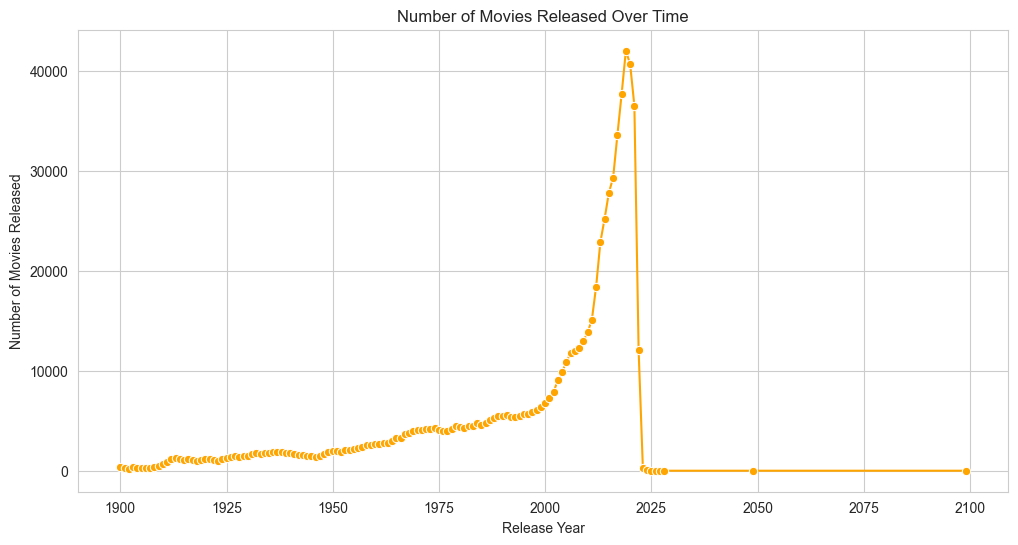

In [33]:
# Extract release year from release date
df['release_year'] = df['release_date'].dt.year

# Count of movies released each year
movies_per_year = df['release_year'].value_counts().sort_index()

# Plot number of movies released each year
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o', color='orange')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.show()


### The number of movies released has generally increased over time, as evidenced by the upward trend of the line.

**Early 20th Century:** Movie production was relatively low in the early 1900s, likely due to the nascent film industry.

**Mid-Century Growth:** A significant increase in movie production occurred around the mid-20th century, potentially reflecting technological advancements, growing popularity of cinema, and wider cultural shifts.

**Recent Decades:** The number of movies released has continued to rise in recent decades, indicating a thriving and expanding film industry.

**Peak Around 1975:** The highest number of movies released occurred around 1975, suggesting a potential boom in film production during that period.
**Decline After 1975:** The number of movies released has declined somewhat since the peak, but it still remains relatively high compared to earlier periods.

## Top 10 Production Companies by Number of Movies

In [34]:
# Display top 10 production companies by number of movies
top_production_companies = df['production_companies'].str.split('-').explode().value_counts().nlargest(10)
print(top_production_companies)


production_companies
Not Available            415044
Warner Bros. Pictures      3599
BBC                        3035
Metro                      2985
Goldwyn                    2966
Mayer                      2938
Columbia Pictures          2887
Universal Pictures         2801
Paramount                  2742
Toei Company               2409
Name: count, dtype: int64


These are the top most production companies all over the world. And most of the production companies nemas are missing and it is indicated by the category "Not Available".

## Vote Average vs. Popularity

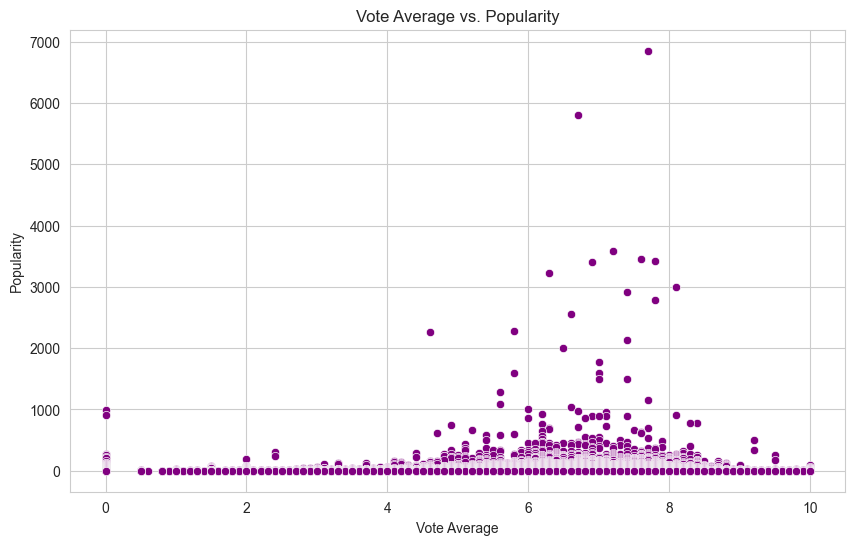

In [35]:
# Scatter plot of vote average vs. popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='popularity', data=df, color='purple')
plt.title('Vote Average vs. Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()


## Release Month Analysis

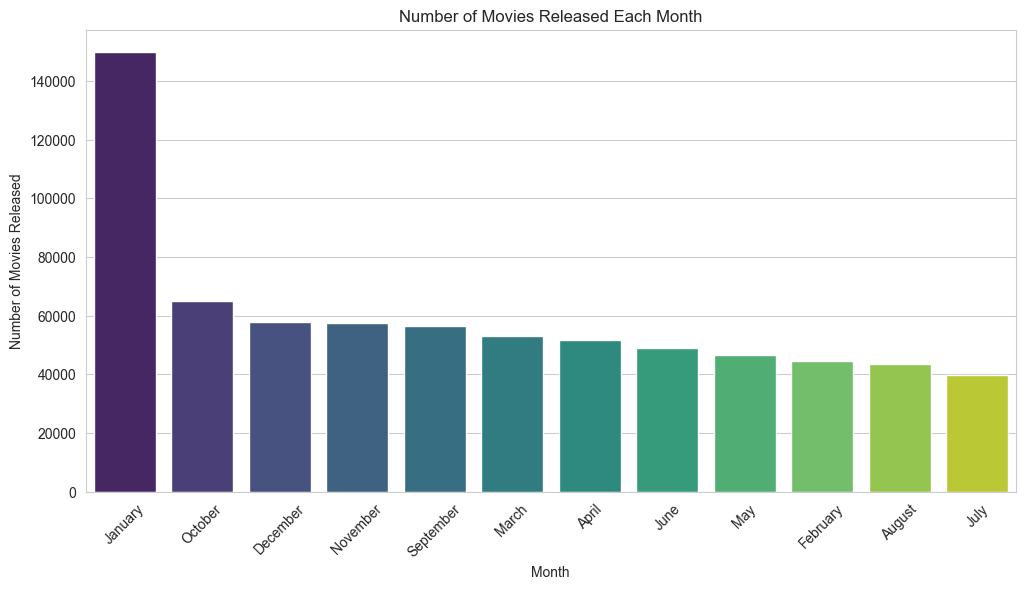

In [36]:
# Extract release month from release date
df['release_month'] = df['release_date'].dt.month_name()

# Plot number of movies released each month
plt.figure(figsize=(12, 6))
sns.countplot(x='release_month', data=df, order=df['release_month'].value_counts().index, palette='viridis')
plt.title('Number of Movies Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.show()


The most no of movies has been released on January.

In [37]:
df.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,profit,release_year,release_month
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,2022-03-30,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...,245200000,2022.0,March
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,2022-03-24,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger,90289828,2022.0,March


## most awaited movie after 2024

In [38]:
# Filter movies Awaited upcoming movies
upcoming_movies = df[df['release_date'].dt.year > 2024]

# Sort upcoming movies by popularity
most_awaited_movie = upcoming_movies.nlargest(10, 'popularity')[['title', 'release_date', 'budget', 'status', 'popularity']]

# Display the most awaited movie
print("Most Awaited upcoming movies")
most_awaited_movie

Most Awaited upcoming movies


,title,release_date,budget,status,popularity
661,Fantastic Beasts 4,2025-08-14,0,Planned,112.222
2084,Avatar 4,2026-12-16,250000000,In Production,50.057
2805,Avatar 5,2028-12-20,250000000,In Production,39.344
37426,Untitled Star Wars Film,2027-12-17,0,Planned,5.403
49202,Untitled Star Wars Film,2027-12-17,0,Planned,4.280
67677,Untitled Star Wars Film,2027-12-17,0,Planned,3.269
71015,Shanghai Dawn,2025-01-01,0,Planned,3.141
71841,Shanghai Dawn,2025-01-01,0,Planned,3.107
174176,Son Göktürk,2025-01-01,0,Planned,1.400
209056,100 Years,2099-11-18,0,Post Production,1.224


The top 10 most awaited upcoming movies

## movies with the highest profit

In [39]:
# Convert 'release_year' to integer
df['release_year'] = df['release_year'].astype('Int64')

# Find the movies with the highest profit

movies_highest_profit = df.nlargest(10, 'profit')[['title', 'budget', 'revenue', 'profit','release_date','release_year']]
print("Movies with the Highest Profit:")
movies_highest_profit

Movies with the Highest Profit:


,title,budget,revenue,profit,release_date,release_year
46,Avatar,237000000,2847246203,2610246203,2009-12-10,2009
162,Avengers: Endgame,356000000,2797800564,2441800564,2019-04-24,2019
297,Titanic,200000000,2187463944,1987463944,1997-11-18,1997
1332,Star Wars: The Force Awakens,245000000,2068223624,1823223624,2015-12-15,2015
87,Avengers: Infinity War,300000000,2046239637,1746239637,2018-04-25,2018
7,Spider-Man: No Way Home,200000000,1892000000,1692000000,2021-12-15,2021
494,Jurassic World,150000000,1671713208,1521713208,2015-06-06,2015
704,The Lion King,260000000,1667635327,1407635327,2019-07-12,2019
610,Furious 7,190000000,1515047671,1325047671,2015-04-01,2015
559,Frozen II,150000000,1450026933,1300026933,2019-11-20,2019


## popularity for each language

In [40]:
# Average popularity for each language
avg_popularity_by_language = df.groupby('original_language')['popularity'].mean()

# Find the language with the highest average popularity
most_popular_language = avg_popularity_by_language.idxmax()

# Display the most popular language and its average popularity
print("Most Popular Language:")
print("Language:", most_popular_language)
print("Average Popularity:", avg_popularity_by_language[most_popular_language])


Most Popular Language:
Language: la
Average Popularity: 75.20887096774193


In [41]:
# Top 10 languages by average popularity
top_10_languages = avg_popularity_by_language.nlargest(10)

# Display the top 10 languages and their average popularity
print("Top 10 Languages by Average Popularity:")
print(top_10_languages)


Top 10 Languages by Average Popularity:
original_language
la    75.208871
os     3.066500
ja     2.562640
ko     2.520892
th     2.318335
en     2.293021
cn     2.114773
hi     1.983517
no     1.979616
es     1.869480
Name: popularity, dtype: float64


The  most popular language is Latin(la)

## Production companies with average popularity

In [42]:
# Average popularity for each production company
avg_popularity_by_company = df.groupby('production_companies')['popularity'].mean()

# Find the production company with the highest average popularity
most_popular_company = avg_popularity_by_company.idxmax()

# Display the most popular production company and its average popularity
print("Most Popular Production Company:")
print("Production Company:", most_popular_company)
print("Average Popularity:", avg_popularity_by_company[most_popular_company])


Most Popular Production Company:
Production Company: SEGA-Original Film-Blur Studios-Marza Animation Planet-Paramount
Average Popularity: 6852.303


Top 10 production companies

In [43]:
top_10_prod_companies = avg_popularity_by_company.nlargest(10)
# Display the top 10 production companies and their average popularity
print("Top 10 production companies by Average Popularity:")
print(top_10_prod_companies)

Top 10 production companies by Average Popularity:
production_companies
SEGA-Original Film-Blur Studios-Marza Animation Planet-Paramount                                            6852.303
Paramount-Fortis Films-3dot Productions-Exhibit A Film                                                      5805.799
Columbia Pictures-Atlas Entertainment-PlayStation Productions-Arad Productions                              3581.549
New Regency Pictures-Focus Features-Perfect World Pictures-Square Peg                                       3451.658
6th & Idaho-Dylan Clark Productions-DC Films-Warner Bros. Pictures                                          3419.546
Epica Pictures INC                                                                                          3409.916
Marvel Studios-Pascal Pictures-Columbia Pictures                                                            3000.059
Thunder Road-30WEST-STX Entertainment-Ingenious Media                                                       2

These are the top 10 production companies with average popularity

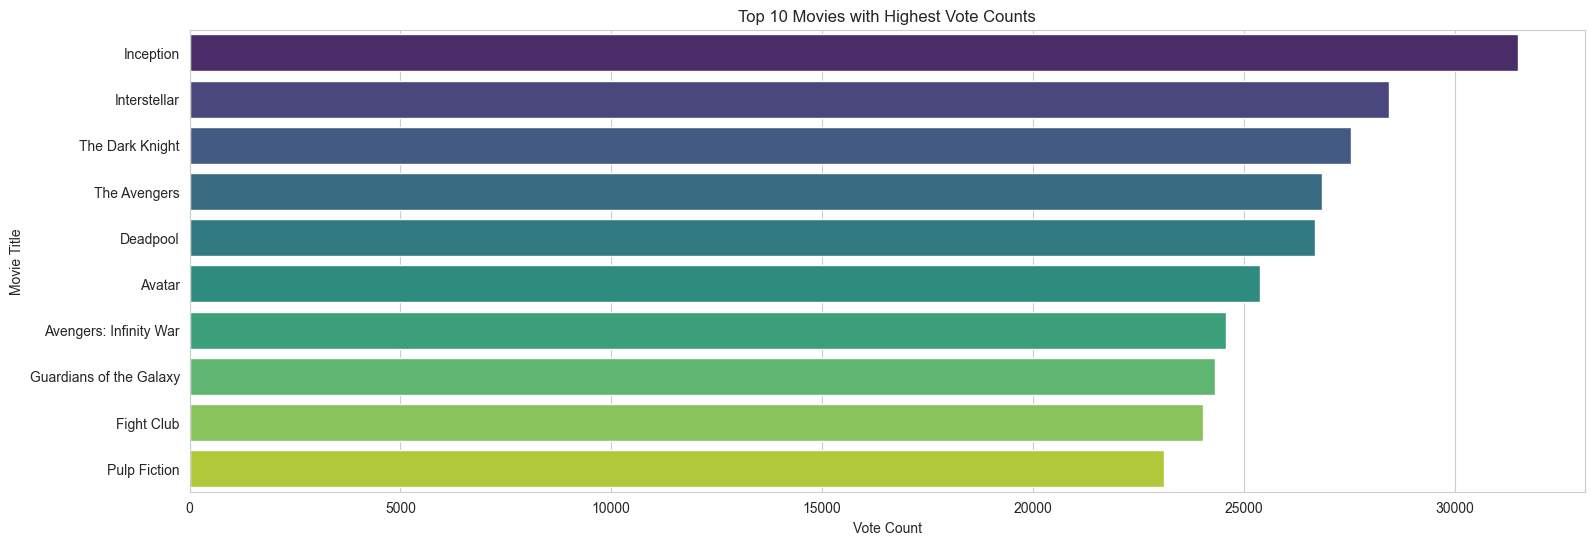

In [44]:
# Get the top 10 movies with highest vote counts
top_voted_movies = df.sort_values(by='vote_count', ascending=False).head(10)

# Plotting
plt.figure(figsize=(18, 6))
sns.barplot(x='vote_count', y='title', data=top_voted_movies, palette='viridis')
plt.title('Top 10 Movies with Highest Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.show()

## movie with the highest vote average

In [45]:
highest_voted_movie = df.sort_values(by='vote_average',ascending=False).iloc[0]
# Display information about the movie with the highest vote average
print("Movie with the Highest Vote Average:")
print("Title:", highest_voted_movie['title'])
print("Vote Average:", highest_voted_movie['vote_average'])


Movie with the Highest Vote Average:
Title: Breakfast at Ina's
Vote Average: 10.0


The Movie with the Highest Vote is **Breakfast at Ina's** with the average vote of **10.0**

In [46]:
df.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,profit,release_year,release_month
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,2022-03-30,110000000,355200000,122.0,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...,245200000,2022,March
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,2022-03-24,74000000,164289828,112.0,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger,90289828,2022,March


Top  3 movies based on high profit, popularity, and votes

In [47]:
# Sorting the DataFrame by profit, popularity, and votes in descending order
df_sorted_profit = df.sort_values(by='profit', ascending=False).head(3)
df_sorted_popularity = df.sort_values(by='popularity', ascending=False).head(3)
df_sorted_votes = df.sort_values(by='vote_count', ascending=False).head(3)

# Displaying the top 3 movies for each category
print("Top 3 Movies with High Profit:")
print(df_sorted_profit[['title', 'profit', 'popularity', 'vote_count']])

print("\nTop 3 Movies with High Popularity:")
print(df_sorted_popularity[['title', 'profit', 'popularity', 'vote_count']])

print("\nTop 3 Movies with High Votes:")
print(df_sorted_votes[['title', 'profit', 'popularity', 'vote_count']])


Top 3 Movies with High Profit:
                 title      profit  popularity  vote_count
46              Avatar  2610246203     669.168       25397
162  Avengers: Endgame  2441800564     268.639       21018
297            Titanic  1987463944     195.608       20986

Top 3 Movies with High Popularity:
                  title     profit  popularity  vote_count
0  Sonic the Hedgehog 2  245200000    6852.303        1465
1         The Lost City   90289828    5805.799         604
2             Uncharted  275124202    3581.549        1981

Top 3 Movies with High Votes:
               title     profit  popularity  vote_count
690        Inception  665532764     109.090       31506
784     Interstellar  536729206     100.173       28455
999  The Dark Knight  819558444      85.538       27544


In [48]:
# Assigning weights to each category
weight_profit = 0.4
weight_popularity = 0.3
weight_votes = 0.3

# Creating a composite score for each movie
df_sorted_profit['composite_score'] = (
    weight_profit * df_sorted_profit['profit'] +
    weight_popularity * df_sorted_profit['popularity'] +
    weight_votes * df_sorted_profit['vote_count']
)

df_sorted_popularity['composite_score'] = (
    weight_profit * df_sorted_popularity['profit'] +
    weight_popularity * df_sorted_popularity['popularity'] +
    weight_votes * df_sorted_popularity['vote_count']
)

df_sorted_votes['composite_score'] = (
    weight_profit * df_sorted_votes['profit'] +
    weight_popularity * df_sorted_votes['popularity'] +
    weight_votes * df_sorted_votes['vote_count']
)

# Displaying the movies with their composite scores
print("Movies with Composite Scores - Profit:")
print(df_sorted_profit[['title', 'composite_score']].sort_values(by='composite_score', ascending=False))

print("\nMovies with Composite Scores - Popularity:")
print(df_sorted_popularity[['title', 'composite_score']].sort_values(by='composite_score', ascending=False))

print("\nMovies with Composite Scores - Votes:")
print(df_sorted_votes[['title', 'composite_score']].sort_values(by='composite_score', ascending=False))


Movies with Composite Scores - Profit:
                 title  composite_score
46              Avatar     1.044106e+09
162  Avengers: Endgame     9.767266e+08
297            Titanic     7.949919e+08

Movies with Composite Scores - Popularity:
                  title  composite_score
2             Uncharted     1.100513e+08
0  Sonic the Hedgehog 2     9.808250e+07
1         The Lost City     3.611785e+07

Movies with Composite Scores - Votes:
               title  composite_score
999  The Dark Knight     3.278317e+08
690        Inception     2.662226e+08
784     Interstellar     2.147002e+08


### Top Movie by Profit:

**Avatar** - Composite Score: 1.04 billion
### Top Movie by Popularity:

**Uncharted** - Composite Score: 110 million
### Top Movie by Votes:

**The Dark Knight** - Composite Score: 327 million


Based on these, we will consider Avatar and Uncharted as the two best movies of all time.

## Total movies released in each year from 1990 to 2023

In [52]:
import plotly.express as px


# Filter movies released from 1990 to 2023
filtered_df = df[(df['release_year'] >= 1990) & (df['release_year'] <= 2023)]

# Count the number of movies released in each year
movies_per_year = filtered_df['release_year'].value_counts().sort_index()

# Create a Plotly bar plot
fig = px.bar(x=movies_per_year.index, y=movies_per_year.values,
             labels={'x': 'Year', 'y': 'Number of Movies'},
             title='Number of Movies Released Each Year (1990-2023)',
             color=movies_per_year.index,
             color_continuous_scale='viridis')

# Show the plot
fig.show()

We can see from 2015 - 2019 the movie releasing has been increased and from 2020 it has decreased.

## top 10 movies with highest revenue

In [58]:
import plotly.express as px

# Get the top 10 movies with highest revenue
top_revenue_movies = df.sort_values(by='revenue', ascending=False).head(10)

# Create a Plotly bar plot
fig = px.bar(top_revenue_movies, x='revenue', y='title', orientation='h',
             labels={'revenue': 'Revenue (in billions)', 'title': 'Movie Title'},
             title='Top 10 Movies with Highest Revenue',
             color='revenue',
             color_continuous_scale='viridis')

# Show the plot
fig.show()


## Top 10 Genres with average votes

In [61]:
# Split genres into a list
df['genre_list'] = df['genres'].str.split('-')

# Explode the list to create separate rows for each genre
df_exploded = df.explode('genre_list')

# Group by genre and calculate the average vote
genre_avg_vote = df_exploded.groupby('genre_list')['vote_average'].mean().reset_index()

# Sort by average vote in descending order
top_genres = genre_avg_vote.sort_values(by='vote_average', ascending=False).head(10)

# Create a Plotly bar plot
fig = px.bar(top_genres, x='vote_average', y='genre_list', orientation='h',
             labels={'vote_average': 'Average Vote', 'genre_list': 'Genre'},
             title='Top 10 Genres by Average Vote',
             color='vote_average',
             color_continuous_scale='viridis')

# Show the plot
fig.show()

## average popularity for each genre

In [62]:
# Split genres into a list
df['genre_list'] = df['genres'].str.split('-')

# Explode the list to create separate rows for each genre
df_exploded = df.explode('genre_list')

# Group by genre and calculate the average popularity
genre_avg_popularity = df_exploded.groupby('genre_list')['popularity'].mean().reset_index()

# Sort by average popularity in descending order
top_popular_genres = genre_avg_popularity.sort_values(by='popularity', ascending=False).head(10)

# Create a Plotly bar plot
fig = px.bar(top_popular_genres, x='popularity', y='genre_list', orientation='h',
             labels={'popularity': 'Average Popularity', 'genre_list': 'Genre'},
             title='Top 10 Popular Genres by Average Popularity',
             color='popularity',
             color_continuous_scale='viridis')

# Show the plot
fig.show()

In [63]:
df.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,profit,release_year,release_month,genre_list
0,675353,Sonic the Hedgehog 2,Action-Science Fiction-Comedy-Family-Adventure,en,After settling in Green Hills Sonic is eager t...,6852.303,SEGA-Original Film-Blur Studios-Marza Animatio...,2022-03-30,110000000,355200000,...,Released,Welcome to the next level.,7.7,1465,Ben Schwartz-Idris Elba-Colleen O'Shaughnessey...,sequel-based on video game-hedgehog-live actio...,245200000,2022,March,"[Action, Science Fiction, Comedy, Family, Adve..."
1,752623,The Lost City,Action-Adventure-Comedy-Romance,en,A reclusive romance novelist who was sure noth...,5805.799,Paramount-Fortis Films-3dot Productions-Exhibi...,2022-03-24,74000000,164289828,...,Released,The adventure is real. The heroes are not.,6.7,604,Sandra Bullock-Channing Tatum-Daniel Radcliffe...,duringcreditsstinger,90289828,2022,March,"[Action, Adventure, Comedy, Romance]"


## movie with the highest popularity and its genre

In [64]:
# Find the row with the highest popularity
highest_popularity_movie = df[df['popularity'] == df['popularity'].max()]

# Extract the title and genres of the highest popularity movie
highest_popularity_title = highest_popularity_movie['title'].values[0]
highest_popularity_genres = highest_popularity_movie['genres'].values[0]

print(f"The movie with the highest popularity is '{highest_popularity_title}' with genres: {highest_popularity_genres}")


The movie with the highest popularity is 'Sonic the Hedgehog 2' with genres: Action-Science Fiction-Comedy-Family-Adventure


______________________________

# Exploratory Data Analysis (EDA) Summary: Movies Dataset

In our comprehensive EDA of a movies dataset containing 780,113 entries and 17 columns, we uncovered valuable insights and patterns across various dimensions. The dataset, encompassing details such as movie title, genres, popularity, budget, and revenue, presented both challenges and opportunities for exploration.

## Key Findings:

### 1. Missing Values:

The dataset exhibited missing values in several columns, notably in 'tagline' and 'keywords.'
Other columns like 'genres,' 'overview,' 'production_companies,' 'release_date,' and 'credits' also had missing values.
### 2. Statistical Analysis:

Descriptive statistics revealed a wide range in the 'budget,' 'popularity,' and 'vote_count,' indicating significant variability among movies.
Central tendency measures provided insights into the distribution of values across numeric columns.
### 3. Distribution Analysis:

Visualizing the distribution of key features such as 'popularity,' 'budget,' 'revenue,' and 'vote_count' showcased interesting patterns.
Right-skewed distributions indicated varying degrees of success, with a few movies standing out in terms of popularity, budget, and revenue.
### 4. Genre Analysis:

The analysis of movie genres unveiled a diverse landscape, with 'Action,' 'Drama,' and 'Comedy' emerging as predominant genres.
A bar plot illustrated the frequency distribution of genres in the dataset.
### 5. Correlation Analysis:

The correlation heatmap provided insights into the relationships between numeric variables.
Strong positive correlations were observed between 'Budget' and 'Revenue,' as well as between 'Popularity' and 'Vote Count.'


## Conclusion:
Our EDA laid the foundation for a deeper understanding of the movies dataset, guiding future analyses and decision-making processes. The exploration of missing values, statistical measures, and visualizations allowed us to grasp the intricacies of the data, providing a basis for further feature engineering and modeling endeavors. The insights gained will inform subsequent steps in leveraging this dataset for more advanced analytics and decision support in the realm of movie industry studies.